# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 15:
Image - Min Value: 5 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


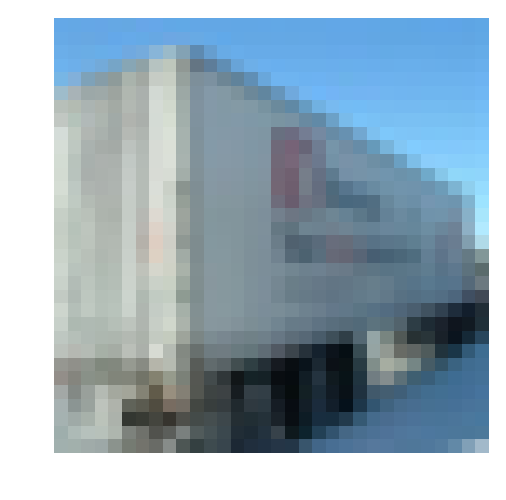

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 15
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x =x*1.0/255
    x = np.array(x)
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [4]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    one_hot_labels = np.zeros((len(x),10))
    for idx, val in enumerate(x):
        one_hot_labels[idx,val] = 1
        
    return one_hot_labels
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    x = tf.placeholder(tf.float32, shape=[None,image_shape[0],image_shape[1],image_shape[2]], name="x")
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    y = tf.placeholder(tf.float32, shape=[None,n_classes], name="y")
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    keep_prob = tf.placeholder(tf.float32, name="keep_prob")
    return  keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [10]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    
    #print(x_tensor.shape[1]) # 32
    #print(conv_ksize) # (2, 2)
    #print(conv_num_outputs) # 10
    #print(type(conv_num_outputs))
    #print((x_tensor))
    #print(type(x_tensor.shape[3]))
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0], conv_ksize[1],tf.to_int32(x_tensor.shape[3]),conv_num_outputs])) # (height, width, input_depth, output_depth)
    #print(type(weight)) # <class 'tensorflow.python.ops.variables.Variable'>
    bias = tf.Variable(tf.zeros([conv_num_outputs]))

    conv_layer = tf.nn.conv2d(x_tensor,weight, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    # Apply activation function
    conv_layer = tf.nn.relu(conv_layer)                
    # Apply Max Pooling
    conv_layer = tf.nn.max_pool(
        conv_layer,
        ksize=[1, pool_ksize[0], pool_ksize[1], 1],
        strides=[1, pool_strides[0], pool_strides[1], 1],
        padding='SAME')

    
    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [5]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs,tf.nn.relu)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [7]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs,None)
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [11]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    x = conv2d_maxpool(x, 90, (3,3), (1,1), (2,2), (2,2))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x = flatten(x)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    x= fully_conn(x, 500)
    x=tf.nn.dropout(x, keep_prob)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    x=output(x,10)
    
    # TODO: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [15]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: keep_probability})
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [17]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.})
    validation_accuracy  = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.})
    print('loss: {}, validation_accuracy: {}'.format(loss, validation_accuracy))
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [18]:
# TODO: Tune Parameters
epochs = 200
batch_size = 256
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  loss: 2.2891464233398438, validation_accuracy: 0.09160000085830688
Epoch  2, CIFAR-10 Batch 1:  loss: 2.2436916828155518, validation_accuracy: 0.11919999867677689
Epoch  3, CIFAR-10 Batch 1:  loss: 2.2771689891815186, validation_accuracy: 0.11640000343322754
Epoch  4, CIFAR-10 Batch 1:  loss: 2.2966270446777344, validation_accuracy: 0.1316000074148178
Epoch  5, CIFAR-10 Batch 1:  loss: 2.3005778789520264, validation_accuracy: 0.10000000149011612
Epoch  6, CIFAR-10 Batch 1:  loss: 2.2825284004211426, validation_accuracy: 0.12099999934434891
Epoch  7, CIFAR-10 Batch 1:  loss: 2.277139186859131, validation_accuracy: 0.14219999313354492
Epoch  8, CIFAR-10 Batch 1:  loss: 2.3003413677215576, validation_accuracy: 0.10520000010728836
Epoch  9, CIFAR-10 Batch 1:  loss: 2.2811121940612793, validation_accuracy: 0.10620000213384628
Epoch 10, CIFAR-10 Batch 1:  loss: 2.269040107727051, validation_accuracy: 0.10760000348091125


Epoch 87, CIFAR-10 Batch 1:  loss: 2.302532911300659, validation_accuracy: 0.10499999672174454
Epoch 88, CIFAR-10 Batch 1:  loss: 2.3025331497192383, validation_accuracy: 0.10499999672174454
Epoch 89, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 90, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 91, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 92, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 93, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 94, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 95, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 96, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 97, CIFAR-10 Batch 1:  loss: 2.3025

Epoch 172, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 173, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 174, CIFAR-10 Batch 1:  loss: 2.3025333881378174, validation_accuracy: 0.10499999672174454
Epoch 175, CIFAR-10 Batch 1:  loss: 2.3025336265563965, validation_accuracy: 0.10499999672174454
Epoch 176, CIFAR-10 Batch 1:  loss: 2.3025336265563965, validation_accuracy: 0.10499999672174454
Epoch 177, CIFAR-10 Batch 1:  loss: 2.3025336265563965, validation_accuracy: 0.10499999672174454
Epoch 178, CIFAR-10 Batch 1:  loss: 2.3025336265563965, validation_accuracy: 0.10499999672174454
Epoch 179, CIFAR-10 Batch 1:  loss: 2.3025336265563965, validation_accuracy: 0.10499999672174454
Epoch 180, CIFAR-10 Batch 1:  loss: 2.3025336265563965, validation_accuracy: 0.10499999672174454
Epoch 181, CIFAR-10 Batch 1:  loss: 2.3025336265563965, validation_accuracy: 0.10499999672174454
Epoch 182, CIFAR-10 Batch 1:  

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  loss: 2.2512009143829346, validation_accuracy: 0.1518000066280365
Epoch  1, CIFAR-10 Batch 2:  loss: 2.256685733795166, validation_accuracy: 0.17260000109672546
Epoch  1, CIFAR-10 Batch 3:  loss: 2.1028711795806885, validation_accuracy: 0.21860000491142273
Epoch  1, CIFAR-10 Batch 4:  loss: 2.0262808799743652, validation_accuracy: 0.2563999891281128
Epoch  1, CIFAR-10 Batch 5:  loss: 2.0750949382781982, validation_accuracy: 0.25119999051094055
Epoch  2, CIFAR-10 Batch 1:  loss: 2.14662504196167, validation_accuracy: 0.2637999951839447
Epoch  2, CIFAR-10 Batch 2:  loss: 1.9457426071166992, validation_accuracy: 0.2508000135421753
Epoch  2, CIFAR-10 Batch 3:  loss: 1.852084755897522, validation_accuracy: 0.2757999897003174
Epoch  2, CIFAR-10 Batch 4:  loss: 1.8987414836883545, validation_accuracy: 0.30799999833106995
Epoch  2, CIFAR-10 Batch 5:  loss: 1.8878189325332642, validation_accuracy: 0.30880001187324524
Epoch  3, CIFAR-10 Batch 1:  loss: 2.

Epoch 18, CIFAR-10 Batch 2:  loss: 1.3192707300186157, validation_accuracy: 0.44359999895095825
Epoch 18, CIFAR-10 Batch 3:  loss: 1.3050363063812256, validation_accuracy: 0.4641999900341034
Epoch 18, CIFAR-10 Batch 4:  loss: 1.297012448310852, validation_accuracy: 0.47380000352859497
Epoch 18, CIFAR-10 Batch 5:  loss: 1.2849746942520142, validation_accuracy: 0.459199994802475
Epoch 19, CIFAR-10 Batch 1:  loss: 1.3701372146606445, validation_accuracy: 0.47380000352859497
Epoch 19, CIFAR-10 Batch 2:  loss: 1.2686426639556885, validation_accuracy: 0.4535999894142151
Epoch 19, CIFAR-10 Batch 3:  loss: 1.2589178085327148, validation_accuracy: 0.4724000096321106
Epoch 19, CIFAR-10 Batch 4:  loss: 1.4030590057373047, validation_accuracy: 0.45159998536109924
Epoch 19, CIFAR-10 Batch 5:  loss: 1.185593843460083, validation_accuracy: 0.4717999994754791
Epoch 20, CIFAR-10 Batch 1:  loss: 1.3301693201065063, validation_accuracy: 0.4715999960899353
Epoch 20, CIFAR-10 Batch 2:  loss: 1.226917147636

Epoch 35, CIFAR-10 Batch 3:  loss: 0.7986140847206116, validation_accuracy: 0.5231999754905701
Epoch 35, CIFAR-10 Batch 4:  loss: 0.9880176782608032, validation_accuracy: 0.5314000248908997
Epoch 35, CIFAR-10 Batch 5:  loss: 0.960502028465271, validation_accuracy: 0.5198000073432922
Epoch 36, CIFAR-10 Batch 1:  loss: 0.8330129384994507, validation_accuracy: 0.5324000120162964
Epoch 36, CIFAR-10 Batch 2:  loss: 0.8729049563407898, validation_accuracy: 0.5022000074386597
Epoch 36, CIFAR-10 Batch 3:  loss: 0.8000467419624329, validation_accuracy: 0.5224000215530396
Epoch 36, CIFAR-10 Batch 4:  loss: 1.0039889812469482, validation_accuracy: 0.525600016117096
Epoch 36, CIFAR-10 Batch 5:  loss: 0.8973487615585327, validation_accuracy: 0.5425999760627747
Epoch 37, CIFAR-10 Batch 1:  loss: 0.8371919393539429, validation_accuracy: 0.5194000005722046
Epoch 37, CIFAR-10 Batch 2:  loss: 0.8132703900337219, validation_accuracy: 0.5246000289916992
Epoch 37, CIFAR-10 Batch 3:  loss: 0.790391921997070

Epoch 52, CIFAR-10 Batch 5:  loss: 0.6454527378082275, validation_accuracy: 0.5609999895095825
Epoch 53, CIFAR-10 Batch 1:  loss: 0.6665241718292236, validation_accuracy: 0.5425999760627747
Epoch 53, CIFAR-10 Batch 2:  loss: 0.7118738889694214, validation_accuracy: 0.5202000141143799
Epoch 53, CIFAR-10 Batch 3:  loss: 0.6532616019248962, validation_accuracy: 0.5454000234603882
Epoch 53, CIFAR-10 Batch 4:  loss: 0.7865354418754578, validation_accuracy: 0.5478000044822693
Epoch 53, CIFAR-10 Batch 5:  loss: 0.690957248210907, validation_accuracy: 0.5618000030517578
Epoch 54, CIFAR-10 Batch 1:  loss: 0.6823400259017944, validation_accuracy: 0.5418000221252441
Epoch 54, CIFAR-10 Batch 2:  loss: 0.6375564336776733, validation_accuracy: 0.5382000207901001
Epoch 54, CIFAR-10 Batch 3:  loss: 0.5688204169273376, validation_accuracy: 0.553600013256073
Epoch 54, CIFAR-10 Batch 4:  loss: 0.758324384689331, validation_accuracy: 0.5582000017166138
Epoch 54, CIFAR-10 Batch 5:  loss: 0.6512254476547241

Epoch 70, CIFAR-10 Batch 2:  loss: 0.5172704458236694, validation_accuracy: 0.5685999989509583
Epoch 70, CIFAR-10 Batch 3:  loss: 0.41300955414772034, validation_accuracy: 0.5546000003814697
Epoch 70, CIFAR-10 Batch 4:  loss: 0.5751153826713562, validation_accuracy: 0.5730000138282776
Epoch 70, CIFAR-10 Batch 5:  loss: 0.4730800688266754, validation_accuracy: 0.5753999948501587
Epoch 71, CIFAR-10 Batch 1:  loss: 0.47834840416908264, validation_accuracy: 0.579200029373169
Epoch 71, CIFAR-10 Batch 2:  loss: 0.49206918478012085, validation_accuracy: 0.574400007724762
Epoch 71, CIFAR-10 Batch 3:  loss: 0.42322874069213867, validation_accuracy: 0.5640000104904175
Epoch 71, CIFAR-10 Batch 4:  loss: 0.6268690824508667, validation_accuracy: 0.5717999935150146
Epoch 71, CIFAR-10 Batch 5:  loss: 0.4670780599117279, validation_accuracy: 0.5831999778747559
Epoch 72, CIFAR-10 Batch 1:  loss: 0.48241791129112244, validation_accuracy: 0.5863999724388123
Epoch 72, CIFAR-10 Batch 2:  loss: 0.4966406226

Epoch 87, CIFAR-10 Batch 3:  loss: 0.32262173295021057, validation_accuracy: 0.578000009059906
Epoch 87, CIFAR-10 Batch 4:  loss: 0.5062047839164734, validation_accuracy: 0.5756000280380249
Epoch 87, CIFAR-10 Batch 5:  loss: 0.4024170935153961, validation_accuracy: 0.579200029373169
Epoch 88, CIFAR-10 Batch 1:  loss: 0.38694196939468384, validation_accuracy: 0.579200029373169
Epoch 88, CIFAR-10 Batch 2:  loss: 0.41392725706100464, validation_accuracy: 0.5698000192642212
Epoch 88, CIFAR-10 Batch 3:  loss: 0.3364080786705017, validation_accuracy: 0.5722000002861023
Epoch 88, CIFAR-10 Batch 4:  loss: 0.47620850801467896, validation_accuracy: 0.5794000029563904
Epoch 88, CIFAR-10 Batch 5:  loss: 0.40884843468666077, validation_accuracy: 0.58160001039505
Epoch 89, CIFAR-10 Batch 1:  loss: 0.390009343624115, validation_accuracy: 0.58160001039505
Epoch 89, CIFAR-10 Batch 2:  loss: 0.4103107452392578, validation_accuracy: 0.5730000138282776
Epoch 89, CIFAR-10 Batch 3:  loss: 0.3480578064918518

Epoch 104, CIFAR-10 Batch 4:  loss: 0.39900368452072144, validation_accuracy: 0.5667999982833862
Epoch 104, CIFAR-10 Batch 5:  loss: 0.32380273938179016, validation_accuracy: 0.5807999968528748
Epoch 105, CIFAR-10 Batch 1:  loss: 0.35596781969070435, validation_accuracy: 0.5942000150680542
Epoch 105, CIFAR-10 Batch 2:  loss: 0.3442787230014801, validation_accuracy: 0.5917999744415283
Epoch 105, CIFAR-10 Batch 3:  loss: 0.3174758553504944, validation_accuracy: 0.5867999792098999
Epoch 105, CIFAR-10 Batch 4:  loss: 0.4159095883369446, validation_accuracy: 0.5735999941825867
Epoch 105, CIFAR-10 Batch 5:  loss: 0.3133545219898224, validation_accuracy: 0.5807999968528748
Epoch 106, CIFAR-10 Batch 1:  loss: 0.3422984480857849, validation_accuracy: 0.5856000185012817
Epoch 106, CIFAR-10 Batch 2:  loss: 0.3491891026496887, validation_accuracy: 0.5884000062942505
Epoch 106, CIFAR-10 Batch 3:  loss: 0.27706995606422424, validation_accuracy: 0.5774000287055969
Epoch 106, CIFAR-10 Batch 4:  loss: 

Epoch 121, CIFAR-10 Batch 4:  loss: 0.37976282835006714, validation_accuracy: 0.5806000232696533
Epoch 121, CIFAR-10 Batch 5:  loss: 0.2730487585067749, validation_accuracy: 0.5609999895095825
Epoch 122, CIFAR-10 Batch 1:  loss: 0.29675906896591187, validation_accuracy: 0.5669999718666077
Epoch 122, CIFAR-10 Batch 2:  loss: 0.29827237129211426, validation_accuracy: 0.5763999819755554
Epoch 122, CIFAR-10 Batch 3:  loss: 0.2586204707622528, validation_accuracy: 0.5807999968528748
Epoch 122, CIFAR-10 Batch 4:  loss: 0.36230263113975525, validation_accuracy: 0.5784000158309937
Epoch 122, CIFAR-10 Batch 5:  loss: 0.27766019105911255, validation_accuracy: 0.569599986076355
Epoch 123, CIFAR-10 Batch 1:  loss: 0.2845304608345032, validation_accuracy: 0.5720000267028809
Epoch 123, CIFAR-10 Batch 2:  loss: 0.29139137268066406, validation_accuracy: 0.5735999941825867
Epoch 123, CIFAR-10 Batch 3:  loss: 0.2547491490840912, validation_accuracy: 0.574400007724762
Epoch 123, CIFAR-10 Batch 4:  loss: 

Epoch 138, CIFAR-10 Batch 4:  loss: 0.3270420432090759, validation_accuracy: 0.5640000104904175
Epoch 138, CIFAR-10 Batch 5:  loss: 0.20328345894813538, validation_accuracy: 0.5803999900817871
Epoch 139, CIFAR-10 Batch 1:  loss: 0.27946099638938904, validation_accuracy: 0.5708000063896179
Epoch 139, CIFAR-10 Batch 2:  loss: 0.22317466139793396, validation_accuracy: 0.5820000171661377
Epoch 139, CIFAR-10 Batch 3:  loss: 0.21073369681835175, validation_accuracy: 0.5825999975204468
Epoch 139, CIFAR-10 Batch 4:  loss: 0.34734123945236206, validation_accuracy: 0.550599992275238
Epoch 139, CIFAR-10 Batch 5:  loss: 0.21737456321716309, validation_accuracy: 0.5789999961853027
Epoch 140, CIFAR-10 Batch 1:  loss: 0.23922328650951385, validation_accuracy: 0.5745999813079834
Epoch 140, CIFAR-10 Batch 2:  loss: 0.2651345729827881, validation_accuracy: 0.5745999813079834
Epoch 140, CIFAR-10 Batch 3:  loss: 0.2024739682674408, validation_accuracy: 0.5763999819755554
Epoch 140, CIFAR-10 Batch 4:  loss

Epoch 155, CIFAR-10 Batch 4:  loss: 0.30158355832099915, validation_accuracy: 0.5529999732971191
Epoch 155, CIFAR-10 Batch 5:  loss: 0.23123545944690704, validation_accuracy: 0.58160001039505
Epoch 156, CIFAR-10 Batch 1:  loss: 0.2202487736940384, validation_accuracy: 0.5884000062942505
Epoch 156, CIFAR-10 Batch 2:  loss: 0.22271645069122314, validation_accuracy: 0.5669999718666077
Epoch 156, CIFAR-10 Batch 3:  loss: 0.16907361149787903, validation_accuracy: 0.5839999914169312
Epoch 156, CIFAR-10 Batch 4:  loss: 0.2857765555381775, validation_accuracy: 0.5612000226974487
Epoch 156, CIFAR-10 Batch 5:  loss: 0.1822219043970108, validation_accuracy: 0.5860000252723694
Epoch 157, CIFAR-10 Batch 1:  loss: 0.20804791152477264, validation_accuracy: 0.5835999846458435
Epoch 157, CIFAR-10 Batch 2:  loss: 0.2101244181394577, validation_accuracy: 0.5802000164985657
Epoch 157, CIFAR-10 Batch 3:  loss: 0.17459024488925934, validation_accuracy: 0.5870000123977661
Epoch 157, CIFAR-10 Batch 4:  loss: 

Epoch 172, CIFAR-10 Batch 4:  loss: 0.2451249063014984, validation_accuracy: 0.5738000273704529
Epoch 172, CIFAR-10 Batch 5:  loss: 0.16153697669506073, validation_accuracy: 0.5827999711036682
Epoch 173, CIFAR-10 Batch 1:  loss: 0.16436943411827087, validation_accuracy: 0.5794000029563904
Epoch 173, CIFAR-10 Batch 2:  loss: 0.13987997174263, validation_accuracy: 0.5834000110626221
Epoch 173, CIFAR-10 Batch 3:  loss: 0.15001392364501953, validation_accuracy: 0.5734000205993652
Epoch 173, CIFAR-10 Batch 4:  loss: 0.2531116008758545, validation_accuracy: 0.5788000226020813
Epoch 173, CIFAR-10 Batch 5:  loss: 0.13801303505897522, validation_accuracy: 0.5723999738693237
Epoch 174, CIFAR-10 Batch 1:  loss: 0.16485460102558136, validation_accuracy: 0.5753999948501587
Epoch 174, CIFAR-10 Batch 2:  loss: 0.13460257649421692, validation_accuracy: 0.5848000049591064
Epoch 174, CIFAR-10 Batch 3:  loss: 0.1577703058719635, validation_accuracy: 0.5834000110626221
Epoch 174, CIFAR-10 Batch 4:  loss: 

Epoch 189, CIFAR-10 Batch 4:  loss: 0.19029700756072998, validation_accuracy: 0.5925999879837036
Epoch 189, CIFAR-10 Batch 5:  loss: 0.17734389007091522, validation_accuracy: 0.579800009727478
Epoch 190, CIFAR-10 Batch 1:  loss: 0.13381759822368622, validation_accuracy: 0.599399983882904
Epoch 190, CIFAR-10 Batch 2:  loss: 0.11845038086175919, validation_accuracy: 0.579200029373169
Epoch 190, CIFAR-10 Batch 3:  loss: 0.09885714203119278, validation_accuracy: 0.5799999833106995
Epoch 190, CIFAR-10 Batch 4:  loss: 0.20047347247600555, validation_accuracy: 0.5821999907493591
Epoch 190, CIFAR-10 Batch 5:  loss: 0.13295932114124298, validation_accuracy: 0.5856000185012817
Epoch 191, CIFAR-10 Batch 1:  loss: 0.14921934902668, validation_accuracy: 0.5759999752044678
Epoch 191, CIFAR-10 Batch 2:  loss: 0.11629529297351837, validation_accuracy: 0.579800009727478
Epoch 191, CIFAR-10 Batch 3:  loss: 0.08497311919927597, validation_accuracy: 0.5839999914169312
Epoch 191, CIFAR-10 Batch 4:  loss: 0

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.59560546875



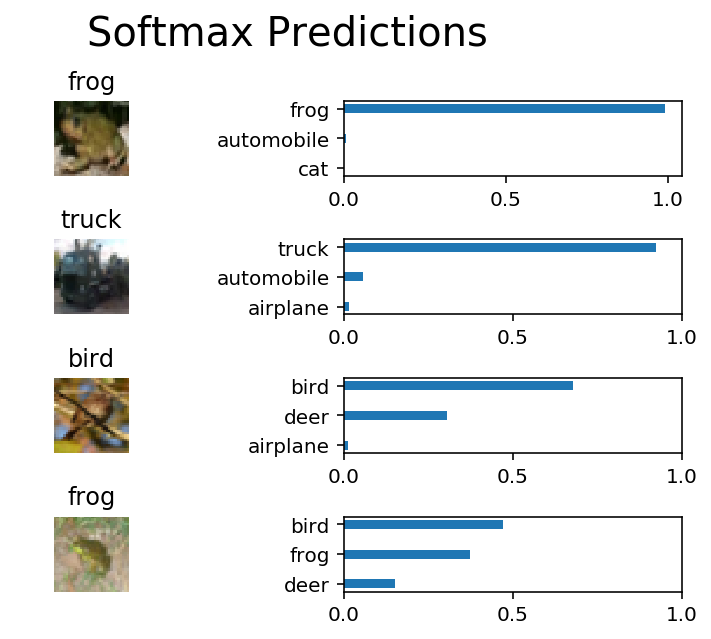

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.